In [1]:
!pip install pycocotools

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import requests
from PIL import Image
from io import BytesIO

In [2]:
import os
import requests

url = 'http://images.cocodataset.org/annotations/annotations_trainval2017.zip'
local_zip_file = 'annotations_trainval2017.zip'

if not os.path.exists(local_zip_file):
    response = requests.get(url)
    with open(local_zip_file, 'wb') as f:
        f.write(response.content)

import zipfile
with zipfile.ZipFile(local_zip_file, 'r') as zip_ref:
    zip_ref.extractall('./')

annotation_file = './annotations/instances_val2017.json'

In [3]:
coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.40s)
creating index...
index created!


In [17]:
imgIds = coco.getImgIds()
print(f"First 10 image IDs: {imgIds[:10]}")

First 10 image IDs: [397133, 37777, 252219, 87038, 174482, 403385, 6818, 480985, 458054, 331352]


In [21]:
catIds = coco.getCatIds()
categories = coco.loadCats(catIds)
for category in categories:
    print(f"Category: {category['name']}, ID: {category['id']}")

Category: person, ID: 1
Category: bicycle, ID: 2
Category: car, ID: 3
Category: motorcycle, ID: 4
Category: airplane, ID: 5
Category: bus, ID: 6
Category: train, ID: 7
Category: truck, ID: 8
Category: boat, ID: 9
Category: traffic light, ID: 10
Category: fire hydrant, ID: 11
Category: stop sign, ID: 13
Category: parking meter, ID: 14
Category: bench, ID: 15
Category: bird, ID: 16
Category: cat, ID: 17
Category: dog, ID: 18
Category: horse, ID: 19
Category: sheep, ID: 20
Category: cow, ID: 21
Category: elephant, ID: 22
Category: bear, ID: 23
Category: zebra, ID: 24
Category: giraffe, ID: 25
Category: backpack, ID: 27
Category: umbrella, ID: 28
Category: handbag, ID: 31
Category: tie, ID: 32
Category: suitcase, ID: 33
Category: frisbee, ID: 34
Category: skis, ID: 35
Category: snowboard, ID: 36
Category: sports ball, ID: 37
Category: kite, ID: 38
Category: baseball bat, ID: 39
Category: baseball glove, ID: 40
Category: skateboard, ID: 41
Category: surfboard, ID: 42
Category: tennis racket

In [22]:
import numpy as np

img_id = 397133
print(f"Selected image ID: {img_id}")

Selected image ID: 397133


In [23]:
img = coco.loadImgs(img_id)

if img:
    img = img[0]
    print(f"Loaded image metadata: {img}")
else:
    print("No image found with the given ID.")

Loaded image metadata: {'license': 4, 'file_name': '000000397133.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg', 'height': 427, 'width': 640, 'date_captured': '2013-11-14 17:02:52', 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg', 'id': 397133}


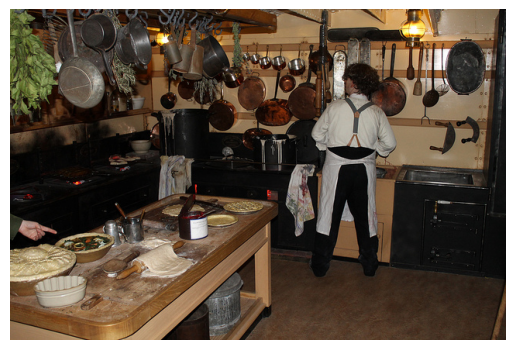

In [24]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

image_url = img['coco_url']
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

plt.imshow(image)
plt.axis('off')
plt.show()

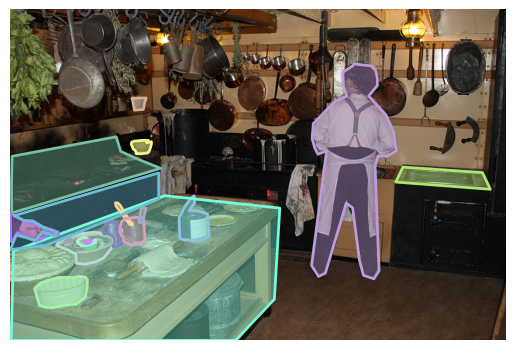

In [20]:
image_url = img['coco_url']
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

plt.imshow(image)
plt.axis('off')

coco.showAnns(anns)
plt.show()

In [21]:
num_images = len(coco.getImgIds())
print(f"Number of images: {num_images}")
num_categories = len(coco.getCatIds())
print(f"Number of categories: {num_categories}")
num_annotations = len(coco.getAnnIds())
print(f"Number of annotations: {num_annotations}")

Number of images: 5000
Number of categories: 80
Number of annotations: 36781


In [22]:
categories = coco.loadCats(coco.getCatIds())
category_names = [cat['name'] for cat in categories]
print(f"Categories: {category_names}")

Categories: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


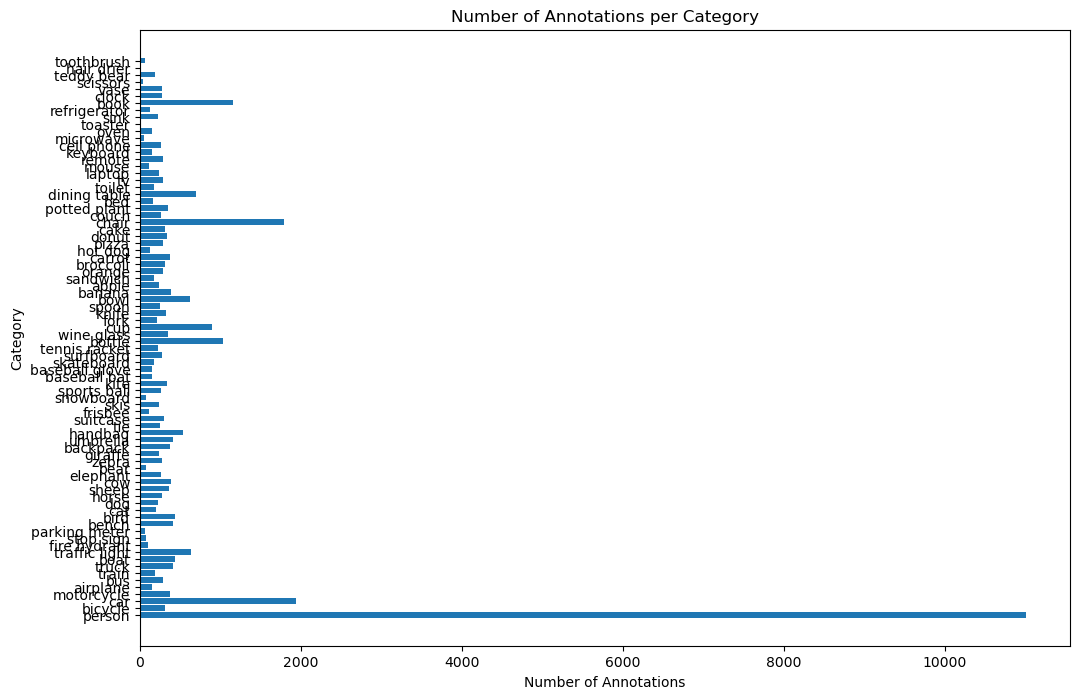

In [23]:
import matplotlib.pyplot as plt

category_annotation_counts = {cat['name']: len(coco.getAnnIds(catIds=[cat['id']])) for cat in categories}

plt.figure(figsize=(12, 8))
plt.barh(list(category_annotation_counts.keys()), list(category_annotation_counts.values()))
plt.xlabel('Number of Annotations')
plt.ylabel('Category')
plt.title('Number of Annotations per Category')
plt.show()

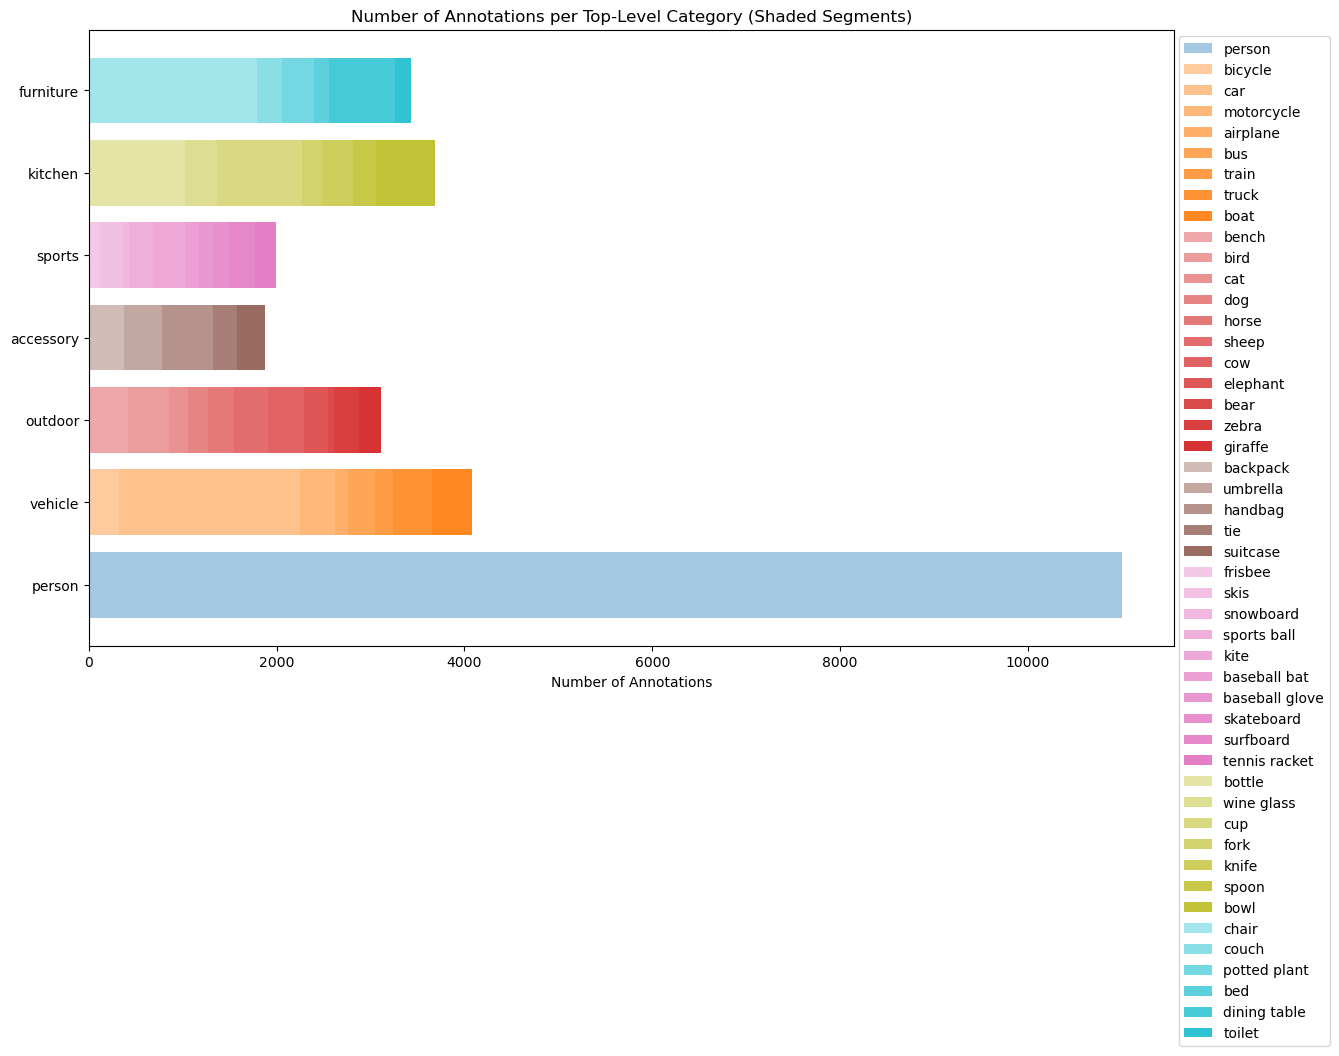

In [13]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Define the top-level categories and their subcategories
hierarchical_categories = {
    'person': ['person'],
    'vehicle': ['bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat'],
    'outdoor': ['bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe'],
    'accessory': ['backpack', 'umbrella', 'handbag', 'tie', 'suitcase'],
    'sports': ['frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket'],
    'kitchen': ['bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl'],
    'furniture': ['chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet']
}

# Initialize a dictionary to store the counts
category_annotation_counts = defaultdict(lambda: defaultdict(int))

# Loop through each category and count the annotations
for top_category, subcategories in hierarchical_categories.items():
    for subcategory in subcategories:
        catId = coco.getCatIds(catNms=[subcategory])[0]
        count = len(coco.getAnnIds(catIds=[catId]))
        category_annotation_counts[top_category][subcategory] = count

# Convert the nested dictionary into a format suitable for plotting
top_categories = list(category_annotation_counts.keys())
subcategories = [list(sub_cat.keys()) for sub_cat in category_annotation_counts.values()]
counts = [list(sub_cat.values()) for sub_cat in category_annotation_counts.values()]

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Set up the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot each top-level category with monochrome shades for each subcategory
y_pos = np.arange(len(top_categories))
bottoms = np.zeros(len(top_categories))

# Base colors for each top-level category
base_colors = plt.cm.tab10(np.linspace(0, 1, len(top_categories)))

legend_handles = []
legend_labels = []

for i, (top_category, subcategory_counts) in enumerate(category_annotation_counts.items()):
    subcategory_names = list(subcategory_counts.keys())
    subcategory_values = list(subcategory_counts.values())
    
    # Generate shades of the base color for the subcategories
    base_color = base_colors[i]
    shades = [mcolors.to_rgba(base_color, alpha=0.4 + 0.6 * (j / len(subcategory_names))) for j in range(len(subcategory_names))]
    
    # Plot each subcategory segment with its respective shade
    for j in range(len(subcategory_names)):
        handle = ax.barh(y_pos[i], subcategory_values[j], left=bottoms[i], color=shades[j])
        bottoms[i] += subcategory_values[j]
        
        # Add the subcategory to the legend only if it's not already added
        if subcategory_names[j] not in legend_labels:
            legend_handles.append(handle)
            legend_labels.append(subcategory_names[j])

# Add labels and titles
ax.set_yticks(y_pos)
ax.set_yticklabels(top_categories)
ax.set_xlabel('Number of Annotations')
ax.set_title('Number of Annotations per Top-Level Category (Shaded Segments)')

# Create a legend with all subcategories
ax.legend(legend_handles, legend_labels, loc='upper right', bbox_to_anchor=(1.15, 1))

plt.savefig('coco_hierarchical_plot.png', dpi=300, bbox_inches='tight')

plt.show()


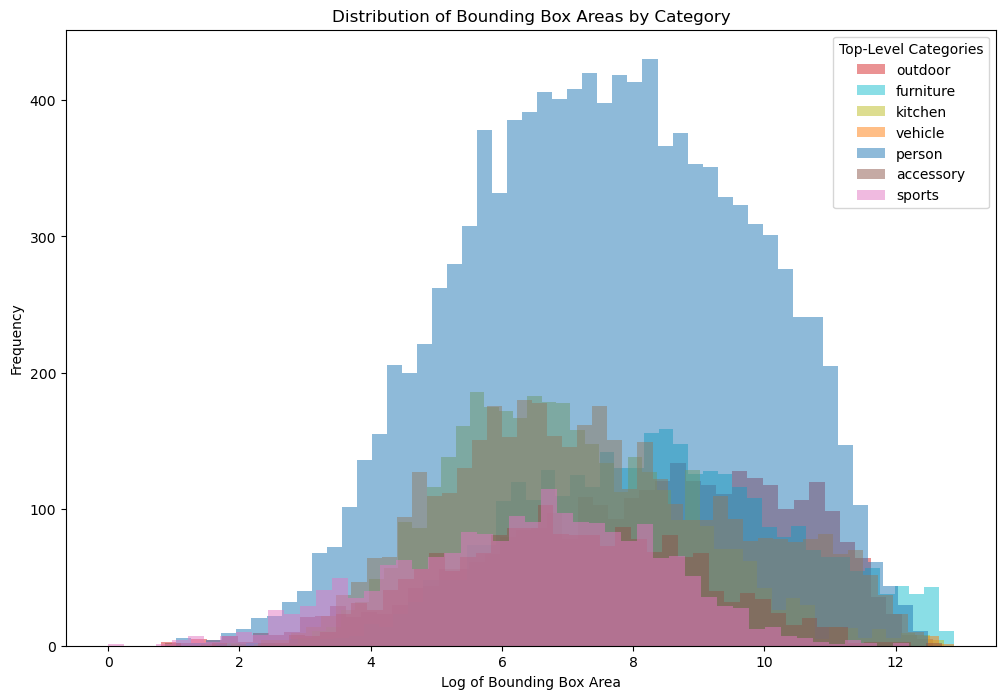

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import defaultdict

# Define the top-level categories and their subcategories
hierarchical_categories = {
    'person': ['person'],
    'vehicle': ['bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat'],
    'outdoor': ['bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe'],
    'accessory': ['backpack', 'umbrella', 'handbag', 'tie', 'suitcase'],
    'sports': ['frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket'],
    'kitchen': ['bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl'],
    'furniture': ['chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet']
}

# Assign a color to each top-level category
base_colors = plt.cm.tab10(np.linspace(0, 1, len(hierarchical_categories)))
category_colors = {top_category: base_colors[i] for i, top_category in enumerate(hierarchical_categories.keys())}

# Create a dictionary to map subcategories to their top-level category
subcategory_to_top_category = {}
for top_category, subcategories in hierarchical_categories.items():
    for subcategory in subcategories:
        subcategory_to_top_category[subcategory] = top_category

# Load all annotations
annIds = coco.getAnnIds()
anns = coco.loadAnns(annIds)

# Categorize bounding box areas by their top-level category
bbox_areas_by_category = defaultdict(list)
for ann in anns:
    category_id = ann['category_id']
    category_name = coco.loadCats([category_id])[0]['name']
    top_category = subcategory_to_top_category.get(category_name)
    if top_category:
        bbox_areas_by_category[top_category].append(ann['area'])

# Plot the histogram with colors based on the main category
plt.figure(figsize=(12, 8))

for top_category, areas in bbox_areas_by_category.items():
    plt.hist(np.log(areas), bins=50, alpha=0.5, label=top_category, color=category_colors[top_category])

plt.xlabel('Log of Bounding Box Area')
plt.ylabel('Frequency')
plt.title('Distribution of Bounding Box Areas by Category')
plt.legend(title="Top-Level Categories")
plt.savefig('coco_hist_plot.png', dpi=300, bbox_inches='tight')
plt.show()


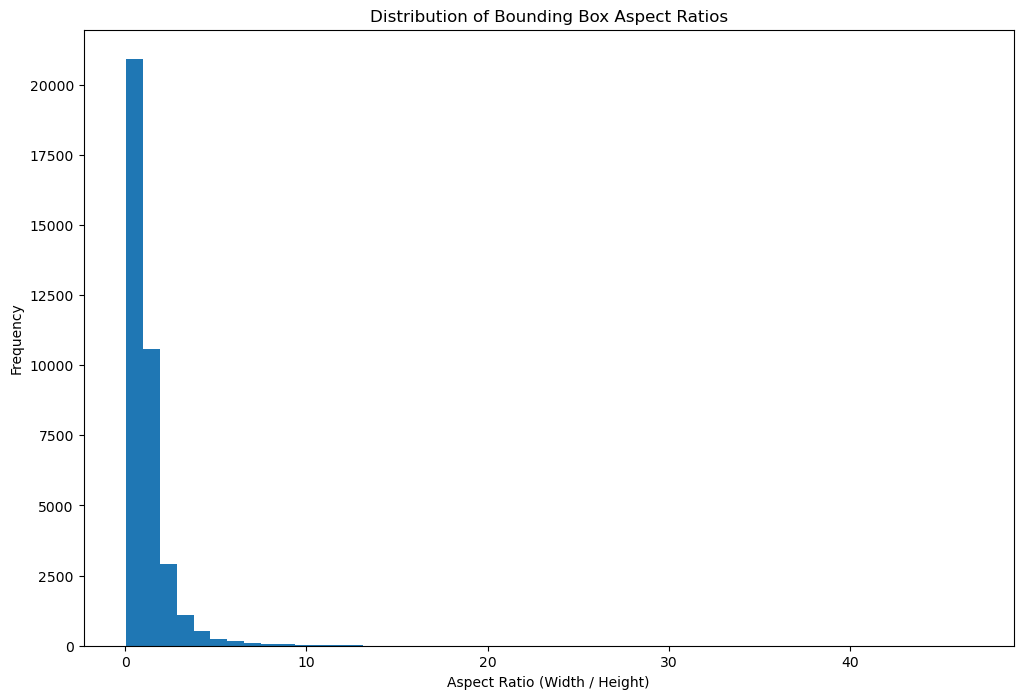

In [25]:
aspect_ratios = [(ann['bbox'][2] / ann['bbox'][3]) for ann in anns if ann['bbox'][3] != 0]

plt.figure(figsize=(12, 8))
plt.hist(aspect_ratios, bins=50)
plt.xlabel('Aspect Ratio (Width / Height)')
plt.ylabel('Frequency')
plt.title('Distribution of Bounding Box Aspect Ratios')
plt.show()

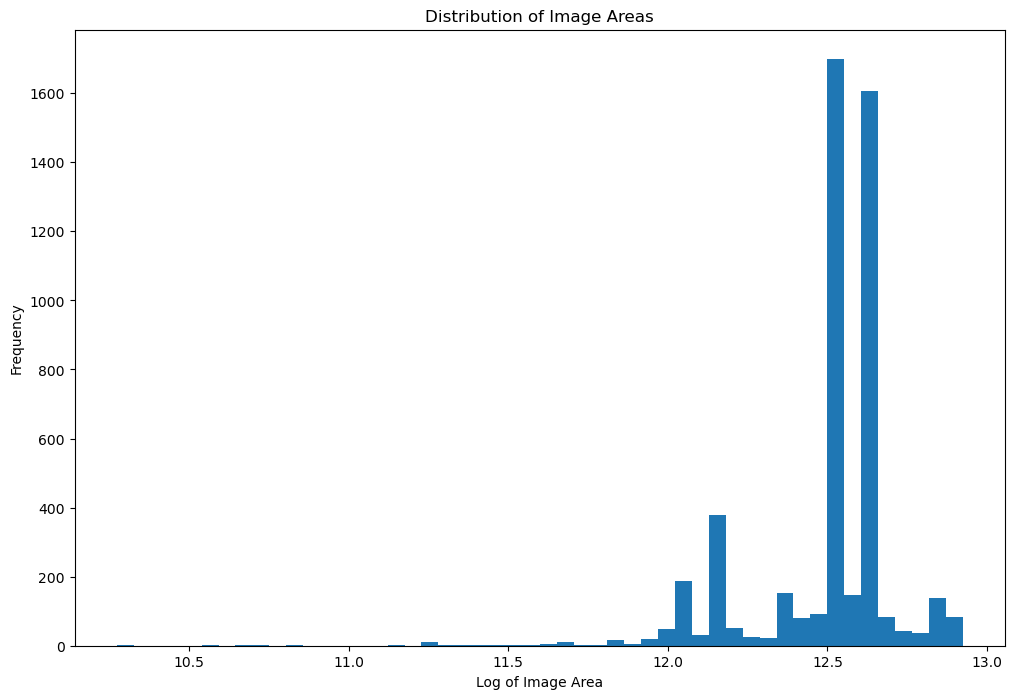

In [26]:
imgIds = coco.getImgIds()
imgs = coco.loadImgs(imgIds)

image_sizes = [(img['width'], img['height']) for img in imgs]
image_areas = [img['width'] * img['height'] for img in imgs]

plt.figure(figsize=(12, 8))
plt.hist(np.log(image_areas), bins=50)
plt.xlabel('Log of Image Area')
plt.ylabel('Frequency')
plt.title('Distribution of Image Areas')
plt.show()

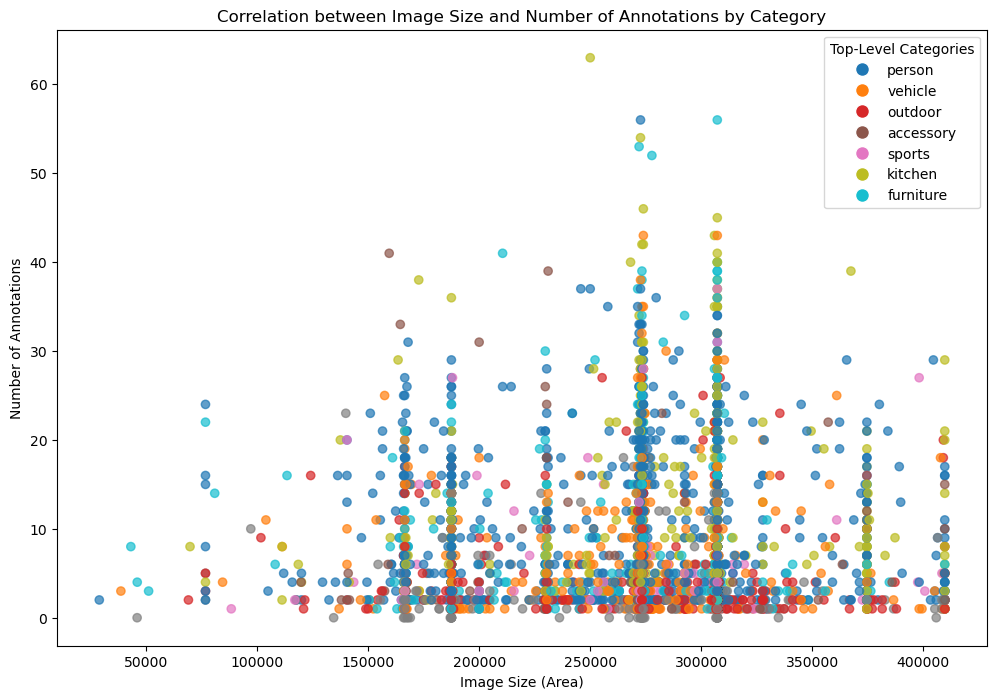

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from pycocotools.coco import COCO

# Get all image IDs
imgIds = coco.getImgIds()
imgs = coco.loadImgs(imgIds)

# Define the top-level categories and their subcategories
hierarchical_categories = {
    'person': ['person'],
    'vehicle': ['bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat'],
    'outdoor': ['bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe'],
    'accessory': ['backpack', 'umbrella', 'handbag', 'tie', 'suitcase'],
    'sports': ['frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket'],
    'kitchen': ['bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl'],
    'furniture': ['chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet']
}

# Assign a color to each top-level category
base_colors = plt.cm.tab10(np.linspace(0, 1, len(hierarchical_categories)))
category_colors = {top_category: base_colors[i] for i, top_category in enumerate(hierarchical_categories.keys())}

# Create a dictionary to map subcategories to their top-level category
subcategory_to_top_category = {}
for top_category, subcategories in hierarchical_categories.items():
    for subcategory in subcategories:
        subcategory_to_top_category[subcategory] = top_category

# Determine the most frequent top-level category for each image
img_top_categories = {}

for img_id in imgIds:
    ann_ids = coco.getAnnIds(imgIds=[img_id])
    anns = coco.loadAnns(ann_ids)
    category_counts = Counter()
    
    for ann in anns:
        category_name = coco.loadCats([ann['category_id']])[0]['name']
        top_category = subcategory_to_top_category.get(category_name)
        if top_category:
            category_counts[top_category] += 1
    
    if category_counts:
        # Assign the most common top-level category to the image
        img_top_categories[img_id] = category_counts.most_common(1)[0][0]
    else:
        img_top_categories[img_id] = None

# Calculate image sizes and annotation counts
img_annotation_counts = {img_id: len(coco.getAnnIds(imgIds=[img_id])) for img_id in imgIds}
img_sizes = [img['width'] * img['height'] for img in imgs]
ann_counts = [img_annotation_counts[img['id']] for img in imgs]

# Get colors for the scatter plot based on the most common top-level category
colors = [category_colors[img_top_categories[img['id']]] if img_top_categories[img['id']] else 'grey' for img in imgs]

# Plot the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(img_sizes, ann_counts, c=colors, alpha=0.7)

plt.xlabel('Image Size (Area)')
plt.ylabel('Number of Annotations')
plt.title('Correlation between Image Size and Number of Annotations by Category')

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in category_colors.values()]
labels = list(category_colors.keys())
plt.legend(handles, labels, title="Top-Level Categories", loc='upper right')

plt.savefig('coco_hist_point_plot.png', dpi=300, bbox_inches='tight')

plt.show()


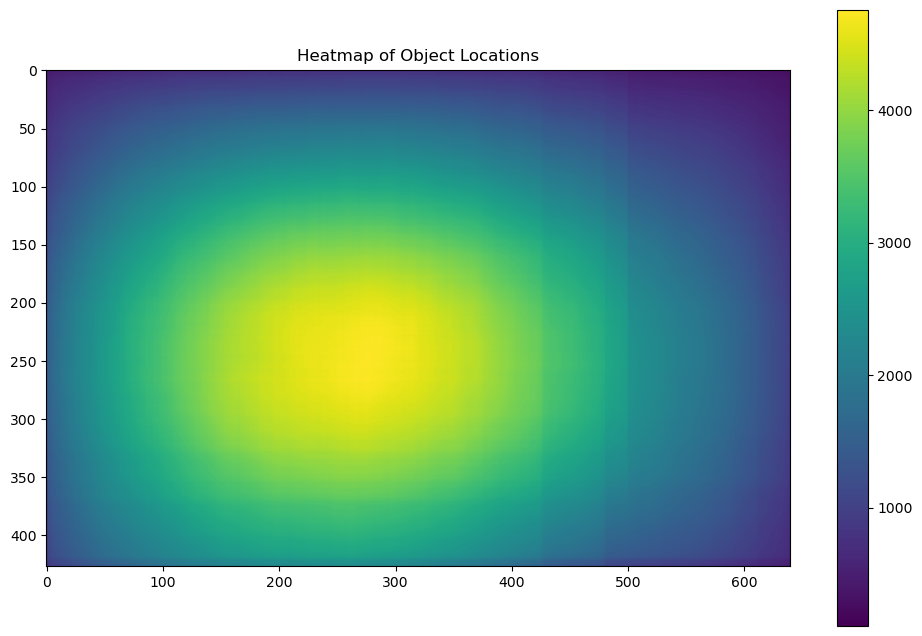

In [28]:
from matplotlib import cm

heatmap = np.zeros((coco.loadImgs(imgIds[0])[0]['height'], coco.loadImgs(imgIds[0])[0]['width']))

for ann in anns:
    bbox = ann['bbox']
    x_min = int(bbox[0])
    y_min = int(bbox[1])
    x_max = int(bbox[0] + bbox[2])
    y_max = int(bbox[1] + bbox[3])
    
    heatmap[y_min:y_max, x_min:x_max] += 1

plt.figure(figsize=(12, 8))
plt.imshow(heatmap, cmap=cm.viridis, interpolation='nearest')
plt.colorbar()
plt.title('Heatmap of Object Locations')
plt.show()

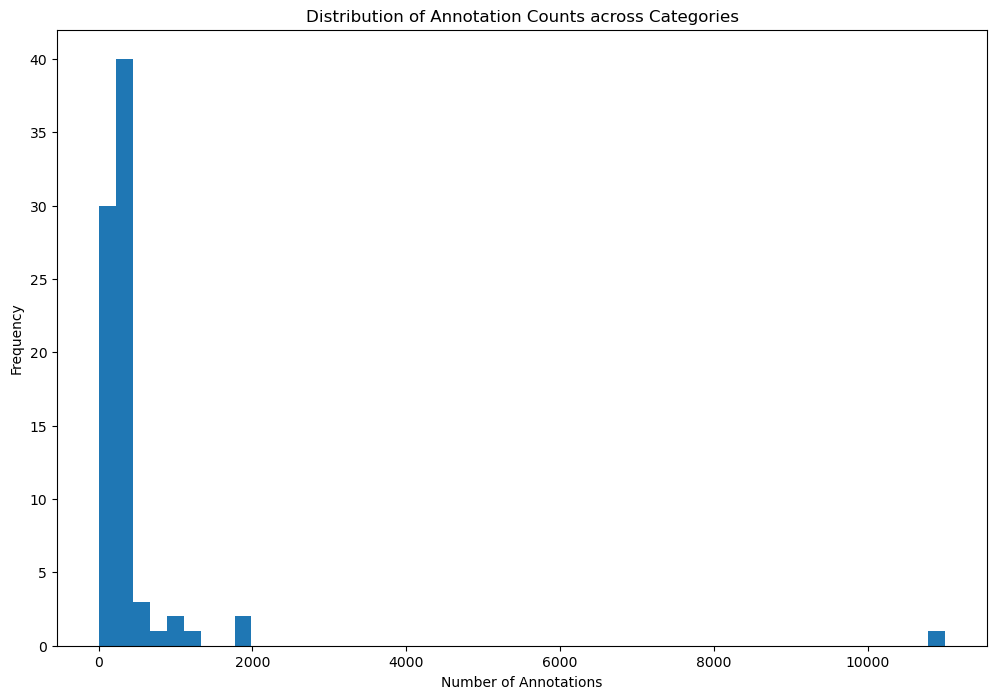

In [29]:
category_counts = list(category_annotation_counts.values())

plt.figure(figsize=(12, 8))
plt.hist(category_counts, bins=50)
plt.xlabel('Number of Annotations')
plt.ylabel('Frequency')
plt.title('Distribution of Annotation Counts across Categories')
plt.show()

Number of crowded annotations: 446


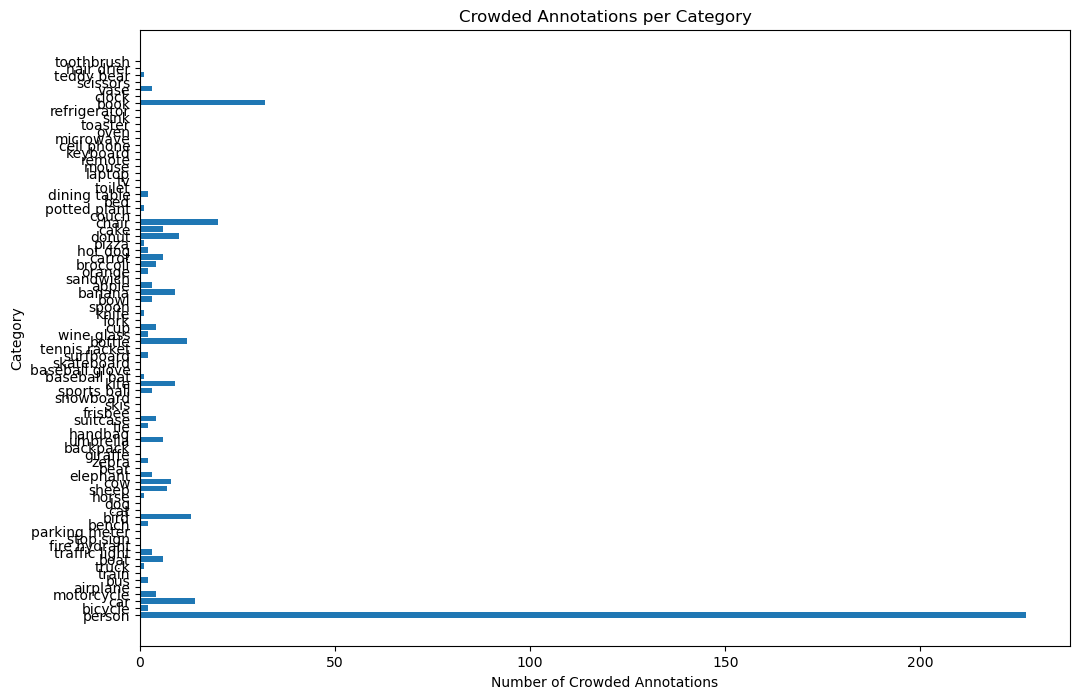

In [30]:
crowded_annotations = [ann for ann in anns if ann['iscrowd'] == 1]

print(f"Number of crowded annotations: {len(crowded_annotations)}")

crowd_cat_counts = {cat['name']: 0 for cat in categories}
for ann in crowded_annotations:
    cat_name = coco.loadCats([ann['category_id']])[0]['name']
    crowd_cat_counts[cat_name] += 1

plt.figure(figsize=(12, 8))
plt.barh(list(crowd_cat_counts.keys()), list(crowd_cat_counts.values()))
plt.xlabel('Number of Crowded Annotations')
plt.ylabel('Category')
plt.title('Crowded Annotations per Category')
plt.show()